# LAB SESSION 1 - DECISION TREES

## Utils

In [1]:
#conda install -c conda-forge scikit-learn, pandas 

In [2]:
#conda install seaborn

## Ex 1: introduction to classification trees

We work with the palmerpenguins dataset (see the dataset document https://allisonhorst.github.io/palmerpenguins/).


**Question 0. First of all,**
 - **load the data and look at them (display the dimension and some descriptive statistics)**
 - **visualize the data.**
 - **select the variables that we will use in the exercise. Create a variable `target` with the the names of the target variable `species` and create also the array `features` which contains the names of the two predictors: `bill_length_mm`, `bill_depth_mm`.**
 - **split the dataset into a training and testing dataset (use the value 1023 for `random_state` and the porportion 25% for the test set).** 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# (1) 
data = pd.read_csv('penguins.csv')

print('dimensions:',data.shape)
data.head()

dimensions: (333, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [5]:
# summarry stats
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


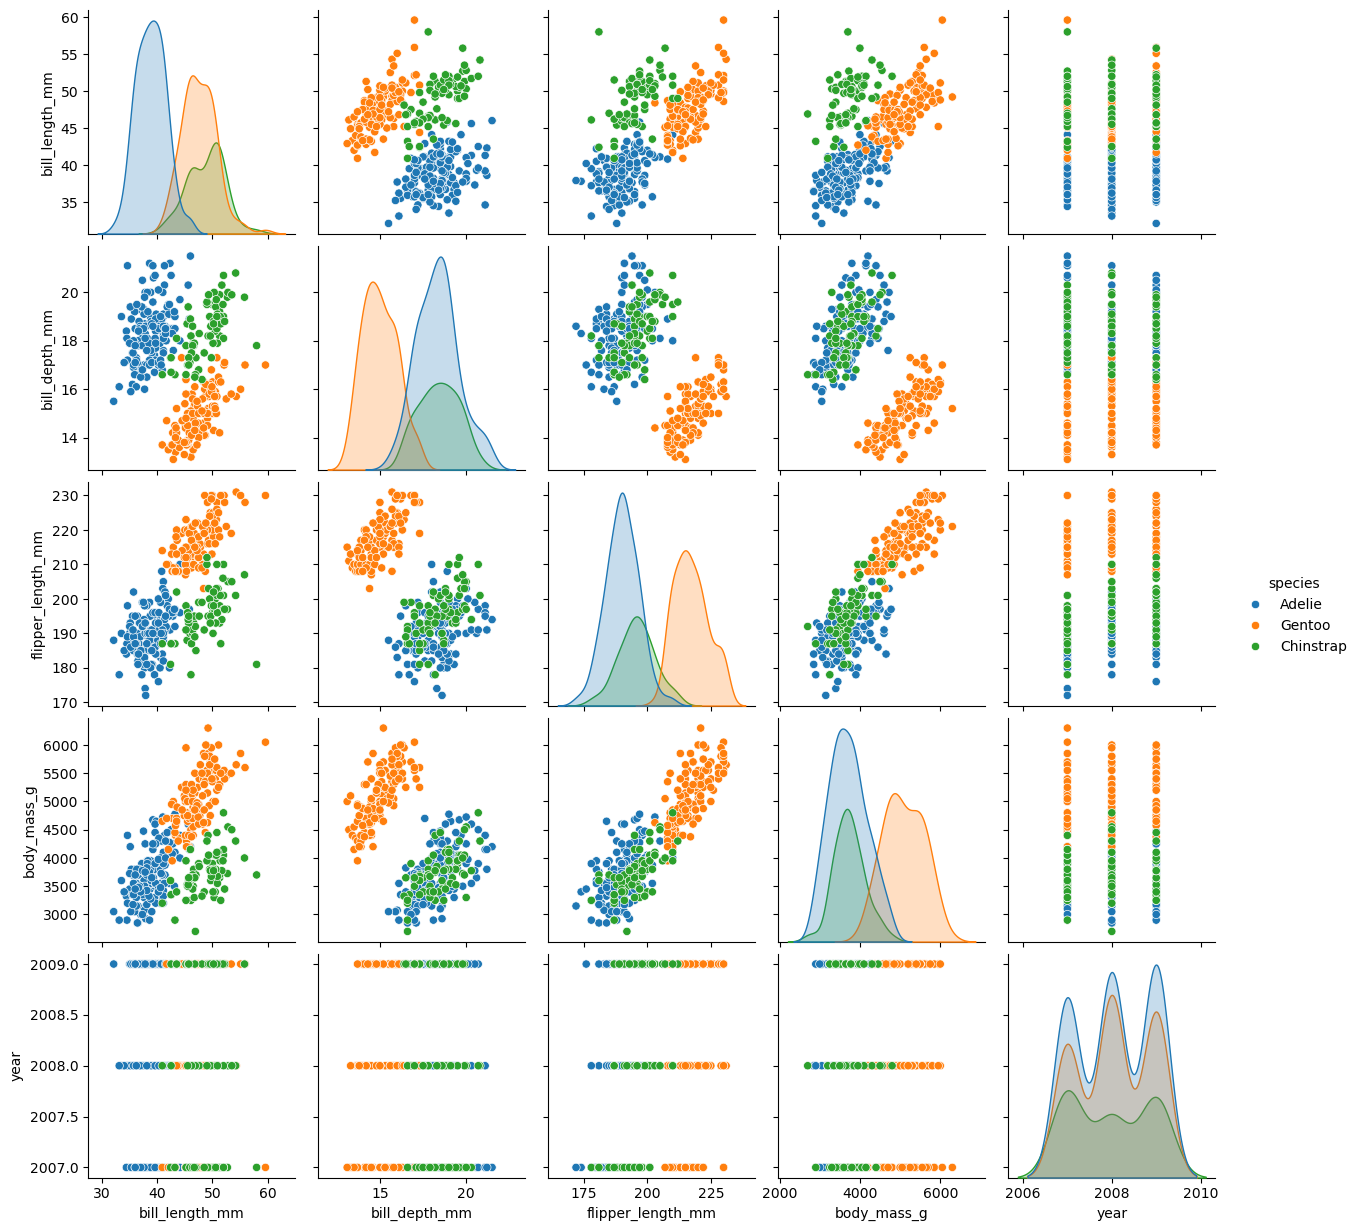

In [6]:
# (2) 
sns.pairplot(data, hue='species')
plt.show() 

In [7]:
# (3) 
Y = data['species']
X = data[['bill_length_mm','bill_depth_mm']]
features = ['bill_length_mm','bill_depth_mm']


In [8]:
# (4) 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1023)

**Question 1. Fit a classification tree named `tree_clf` to explain `species` by using `bill_length_mm`, `bill_depth_mm`. Use `DecisionTreeClassifier` from `sklearn.tree`. Have a look at the documentation ([here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)). Plot the tree and give its text representation.**

**Indication: your tree is build by using the train set and the Gini criterion. The tree has a maximum depth of 2 and you use the value 1023 for `random_state`.**

In [9]:
##TODO
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1023)
tree_clf.fit(X_train[features], y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1023
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Question 1bis. Why do we need to choose a value for `random_state`? (use the documentation).**

Answer: When there is simimlar impurity gain, in this context the function will select randomly which split to use. What do we mean by similar impurity gain: in the instance your algorithm has options of spliting the observations and both the options have the same impurity , this necessisates a random choice for the split.

**Question 2. Based on the plot of the tree, write the prediction $f_n(\mathbf x)$ associated to the tree for a new observation $\mathbf x \in \mathbb R^2$.** 

*Indications:* 
- *bill_length_mm is consider as the first feature and so is denoted by $X_1$ while bill_depth_mm is the second feature and is then denoetd by $X_2$.*
- *The modalities of `Species`will be coded as integer: Adelia =0, Chinstrap=1 and Gentoo=2.*

$$f_n(\mathbf x) = 2 \cdot \mathbb{1}_{\{(X_{1} \le 42.55 ,  X_{2} \le 14.85) or {(X_{1} > 42.55 , X_{2} \le 16.35)\}}}  + 0 \cdot \mathbb{1}_{\{X_{1} \le 42.55 , X_{2} > 14.85\}} + 1 \cdot \mathbb{1}_{\{X_{1} > 42.55 , X_{2} > 16.35\}}$$  

The indicator function will be 0 if the condition is not met and 1 if the condition is met

In [10]:
from sklearn import tree
text_rep = tree.export_text(tree_clf)
print(text_rep)

|--- feature_0 <= 42.55
|   |--- feature_1 <= 14.85
|   |   |--- class: Gentoo
|   |--- feature_1 >  14.85
|   |   |--- class: Adelie
|--- feature_0 >  42.55
|   |--- feature_1 <= 16.35
|   |   |--- class: Gentoo
|   |--- feature_1 >  16.35
|   |   |--- class: Chinstrap



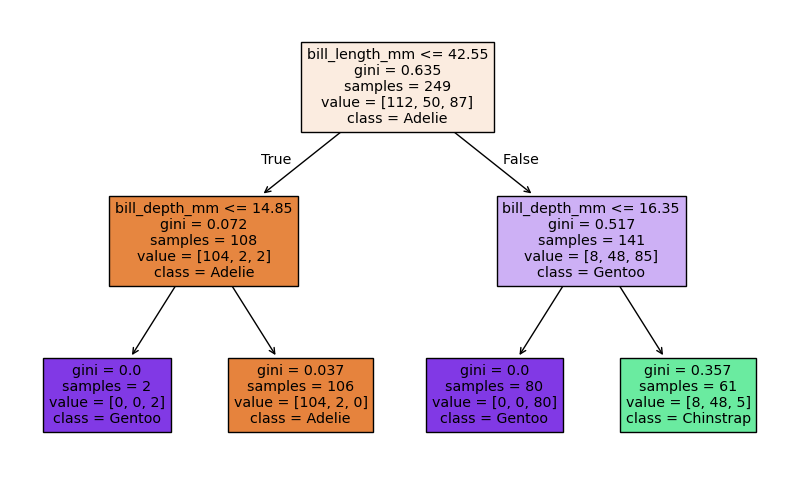

In [11]:
fig = plt.figure(figsize=(10,6))
tree_plot = tree.plot_tree(tree_clf, feature_names=features, class_names=tree_clf.classes_, filled=True)

As we split the impurity decreases (we want this)

**Question 3. Consider a penguin with a bill measuring 45mm (length) and 18mm (depth). By looking at the tree plot, give the probability that this penguin belongs to the Adelie familly, $\mathbf P(Species =Adelie \, \vert \, x_1 = 45, x_2=18)$ ? Check your result by using the methods `predict_proba()`,see ([here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).**

Answer:  
Based on the tree node 1 : bill length $\le 42.55$ = false; node 2 : bill depth $\le 16.35$ = false. so it falls in final node Chinstrap. Total samples in this node is $61$ and adelie is index $0$ thus the probability of $P$ being in class adelie is $\frac{8}{61} = 0.131$.

In [12]:
##TODO
# new data point#
# x_new = pd.DataFrame({'bill_length_mm':[45], 'bill_depth_mm': [18],index=['new'])
x_new = np.array([[45, 18]]) 

# predict probability
x_prob = tree_clf.predict_proba(x_new)
print(x_prob)

[[0.13114754 0.78688525 0.08196721]]


C:\Users\Ethel Ogallo\.conda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Question 4. Plot the data and the partition associated to the tree. Does the partition agree with the treedisplayed at the previous question ?**

Answer: Yes

C:\Users\Ethel Ogallo\.conda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Penguins dataset')

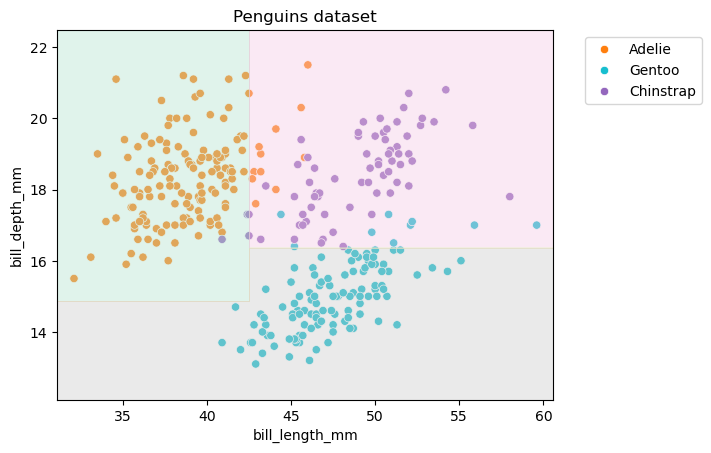

In [13]:
##------- Complete the command below by filling in the gaps '...'.-------##

range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in ['bill_length_mm','bill_depth_mm']
}

import numpy as np

# A function to plot the partition associated to a decision tree model
def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="Pastel2")

    return ax

# Define the colors used
palette = ["tab:orange", "tab:cyan", "tab:purple"]

ax = sns.scatterplot(data= data, x= 'bill_length_mm', y='bill_depth_mm',hue='species', palette=palette)# Define the grid : the data space 
plot_decision_function(fitted_classifier=tree_clf, range_features=range_features, ax=ax) # display the tree partition
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # graphical options
plt.title("Penguins dataset")# graphical options


**Question 5: Look at the tree structure by using the attribute `tree_`. See the documentations ([here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).Give the number of nodes, the impurity of each node, the node inodes, the id of the nodes, features and threshold used to split, the number of samples in each node.**





In [14]:
##TODO
# print(tree_clf.tree_.node_count)
# print(tree_clf.tree_.impurity)
# print(tree_clf.tree_.feature)
# print(tree_clf.tree_.threshold)
# print(tree_clf.tree_.n_node_samples)
# print(tree_clf.tree_.children_left)
# print(tree_clf.tree_.children_right)

tree_ = tree_clf.tree_
tree_summary = pd.DataFrame({
    "node": range(tree_.node_count),
    "feature": [None if i == -2 else tree_clf.feature_names_in_[i] for i in tree_.feature],
    # "feature": tree_.feature,
    "threshold": tree_.threshold,
    "impurity": tree_.impurity,
    "n_node_samples": tree_.n_node_samples,
    "left_child": tree_.children_left,
    "right_child": tree_.children_right
})

print(tree_summary)

   node         feature  threshold  impurity  n_node_samples  left_child  \
0     0  bill_length_mm  42.549999  0.635280             249           1   
1     1   bill_depth_mm  14.850000  0.072016             108           2   
2     2            None  -2.000000  0.000000               2          -1   
3     3            None  -2.000000  0.037024             106          -1   
4     4   bill_depth_mm  16.349999  0.517479             141           5   
5     5            None  -2.000000  0.000000              80          -1   
6     6            None  -2.000000  0.356893              61          -1   

   right_child  
0            4  
1            3  
2           -1  
3           -1  
4            6  
5           -1  
6           -1  


**Question 6. Predict the class of each observation of the test sample by using the tree and display the confusion matrix. Explain it. How many observations are misclassified? Give the error rate (displayed only twe decimals).**

For species Adelie 2 observations misclassified, for chinstrap 7 misclassified and for Gentoo none

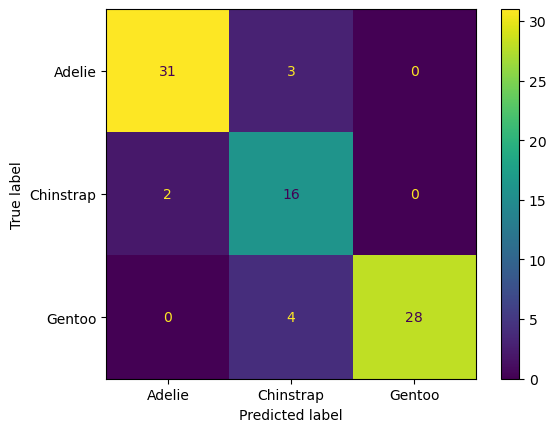

In [15]:
##TODO
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

# get the predictions on the test set
pred_test = tree_clf.predict (X_test[features])

# draw the confusion matrix
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_test) , display_labels = tree_clf.classes_ )
cm .plot()


In [16]:
# error rate
OA = tree_clf.score(X_test[features], y_test)
print(f"error rate: {1 - OA:.2f}")

error rate: 0.11


**Question 7. Fit a second tree with the gini criterion, a maximum depth of 5 and `random_state`=1023. Draw the tree and compute the accuracy of this second tree on the test set. Compare the accuracy between the two trees. What tree do you choose? Justify.**

Tree 2: It has a better overall accuracy at 0.94 and thus a lower rate compared to the previous model at 0.84.

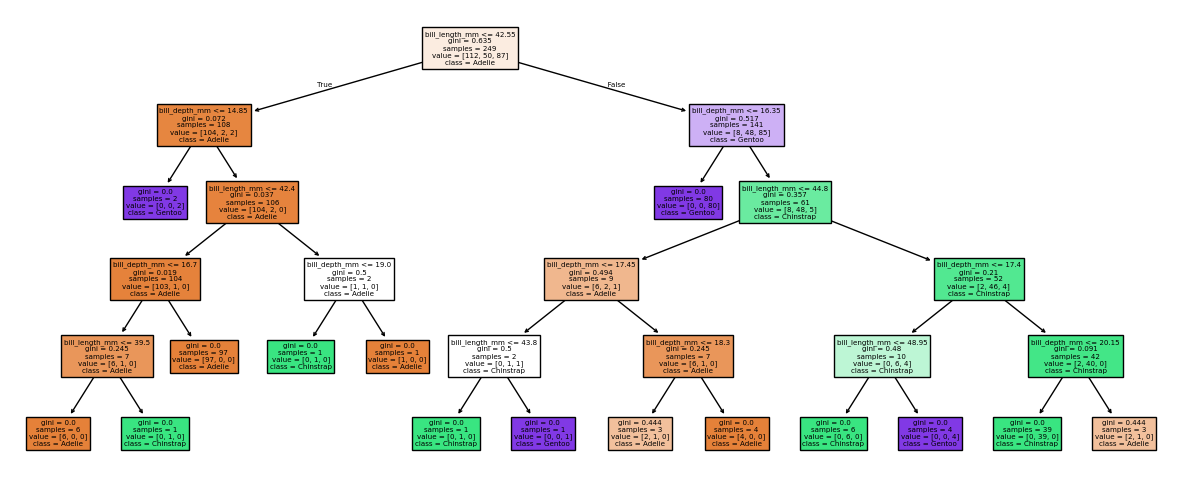

Accuracy model 1: 0.89
Accuracy model 2: 0.94


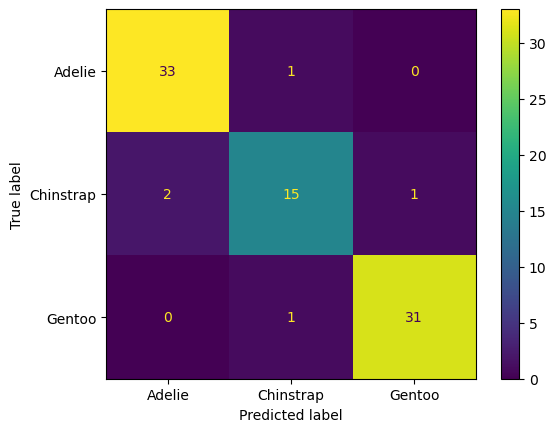

In [17]:
##TODO
# fit model
tree_clf2 = DecisionTreeClassifier(max_depth=5, criterion='gini',random_state=1023)
tree_clf2.fit(X_train[features], y_train)

# viz tree
fig = plt.figure(figsize=(15, 6))
tree_plot = tree.plot_tree(tree_clf2, feature_names=features, class_names=tree_clf2.classes_, filled=True)
plt.show()

# confusion matrix
pred_test2 = tree_clf2.predict (X_test[features])
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_test2) , display_labels = tree_clf2.classes_ )
cm.plot()

# accuracy
# error rate
OA_1 = tree_clf.score(X_test[features], y_test)
OA_2 = tree_clf2.score(X_test[features], y_test)
print(f"Accuracy model 1: {OA_1:.2f}")
print(f"Accuracy model 2: {OA_2:.2f}")


**BONUS. As we don't know what what is the optiml size of the tree, we will apply the cost-complexity pruning method that consists in the following steps.**
   - **Step 1: Fit the maximum tree (don't choose any value for max_depth and use random_state=1023)**
   - **Step 2: Get a sequence of values for the parameter (ccp_alpha) using the method `cost_complexity_pruning_path()` and built a tree for each value of the complexity parameter. Indication: the parameter `ccp_alpha`enables to make a trade-off between accuracy and complexity.**
   - **Step 3: Compute the accuracy on both the train set and test set for each tree.**
   - **Step 4: Draw the following plots :**
      **Plot 1 = number of nodes of a tree vs ccp_alpha,**
      **Plot 2 = tree depth vs ccp_alpha**
      **Plot 3 and 4 = accuracy vs ccp_alpha for training and testing sets.**
      
**Run the code below and commend the graphics. What tree do you select ? Justifiy and plot it.**

In [18]:
## Step 1
from sklearn.tree import DecisionTreeClassifier, plot_tree
max_tree_clf = DecisionTreeClassifier(random_state=2310)

In [19]:
## Step 2
path = max_tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas= path.ccp_alphas; #print('ccp-alphas values:',ccp_alphas)

tree_clfs = []
for alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=2310, ccp_alpha=alpha)
    tree_clf.fit(X_train, y_train)
    tree_clfs.append(tree_clf)


tree_clfs = tree_clfs[:-1] #a list including all the decision trees for all alpha values
ccp_alphas = ccp_alphas[:-1] #a list including all alpha values


node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs]#a vector with the number of nodes for all decision trees 
depth = [tree_clf.tree_.max_depth for tree_clf in tree_clfs]#a vector with the depth for all decision trees 

In [20]:
print(depth)

[6, 6, 6, 6, 5, 5, 5, 3, 3, 2, 1]


In [21]:
## Step 3
train_acc = [tree_clf.score(X_train, y_train) for tree_clf in tree_clfs]
test_acc = [tree_clf.score(X_test, y_test) for tree_clf in tree_clfs]

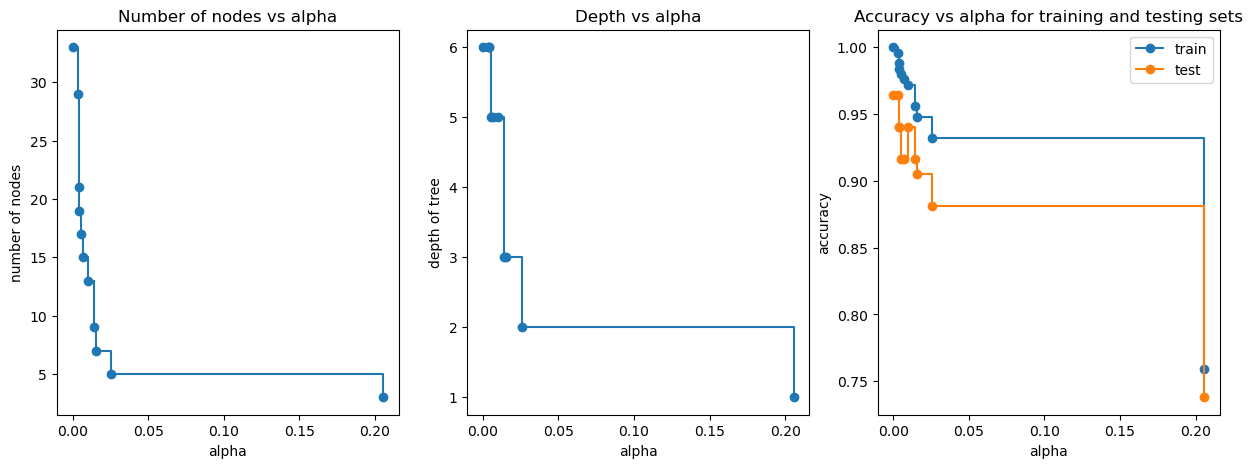

In [22]:
## Step 4

fig, ax = plt.subplots(1, 3,figsize=(15,5))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

ax[2].plot(ccp_alphas, train_acc, marker='o', label="train", drawstyle="steps-post")
ax[2].plot(ccp_alphas, test_acc, marker='o', label="test",   drawstyle="steps-post")
ax[2].set_xlabel("alpha")
ax[2].set_ylabel("accuracy")
ax[2].set_title("Accuracy vs alpha for training and testing sets")
ax[2].legend()
plt.show()

Answer:  
Alpha is the complexity of the model- cost to cut the tree  
A low alpha size shows a large number of nodes, and larger depth which corresponds to a small training error with also low generalization error. This could be due to overfitting. A high alpha corresponds to a low number of nodes and tree depth but a lower accuracy level and this could be due to underfitting.  
I would choose the tree where the difference between training error and testing error is not too large or too small either becasue that means the tradeoff between bias and variance is balanced.


In [23]:
##TODO


## Ex 2: introduction to regression trees

We work with the iris dataset (see the dataset documentation https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).


**Question 0. First of all,**
 - **load the data and look at them (dimension, attributes, statistic summary).** 
 - **select the variables that we will use in the exercise (predictor = `sepal length`, target = `petal width`)**
 - **plot the data (x-axis = `sepal length`, y-axis = `petal width`).**
 - **split the dataset into a training and testing dataset (use `random_state`=2310 and `test_size`=0.3).**

In [24]:
## TODO
from sklearn import datasets 

# Load the iris dataset as a pandas DataFrame
iris = datasets.load_iris(as_frame=True)
iris_df = iris.frame

# Display the first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
print(iris_df.shape)
print(iris_df.describe())

(150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


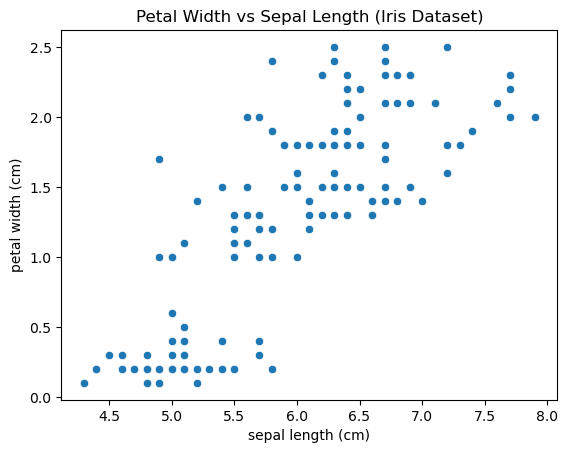

In [26]:
sns.scatterplot(
    data=iris_df,
    x="sepal length (cm)",
    y="petal width (cm)"
)

plt.title("Petal Width vs Sepal Length (Iris Dataset)")
plt.show()

**Question 1. Fit a regression tree + a linear model to explain `petal width` by using `sepal length`. Use `DecisionTreeRegressor` from `sklearn.tree`. Have a look at the documentation ([here tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [here linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). Plot the tree and give its text representation.**

**Indication: your tree is build by using the train set and an appropriate impurity criterion. The tree has a maximum depth of 3 and you use the value 2310 for `random_state`. Use the default parameter values for the linear model.**

In [27]:
##TODO
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split the data
X = iris_df[['sepal length (cm)']]
Y = iris_df['petal width (cm)']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2310)

# linear regression model
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

# regression tree
tree_rg = DecisionTreeRegressor(max_depth=3, random_state=2310)
tree_rg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2310
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


|--- sepal length (cm) <= 5.55
|   |--- sepal length (cm) <= 4.85
|   |   |--- sepal length (cm) <= 4.35
|   |   |   |--- value: [0.10]
|   |   |--- sepal length (cm) >  4.35
|   |   |   |--- value: [0.23]
|   |--- sepal length (cm) >  4.85
|   |   |--- sepal length (cm) <= 5.45
|   |   |   |--- value: [0.48]
|   |   |--- sepal length (cm) >  5.45
|   |   |   |--- value: [0.65]
|--- sepal length (cm) >  5.55
|   |--- sepal length (cm) <= 6.15
|   |   |--- sepal length (cm) <= 5.85
|   |   |   |--- value: [1.36]
|   |   |--- sepal length (cm) >  5.85
|   |   |   |--- value: [1.49]
|   |--- sepal length (cm) >  6.15
|   |   |--- sepal length (cm) <= 6.65
|   |   |   |--- value: [1.77]
|   |   |--- sepal length (cm) >  6.65
|   |   |   |--- value: [1.99]



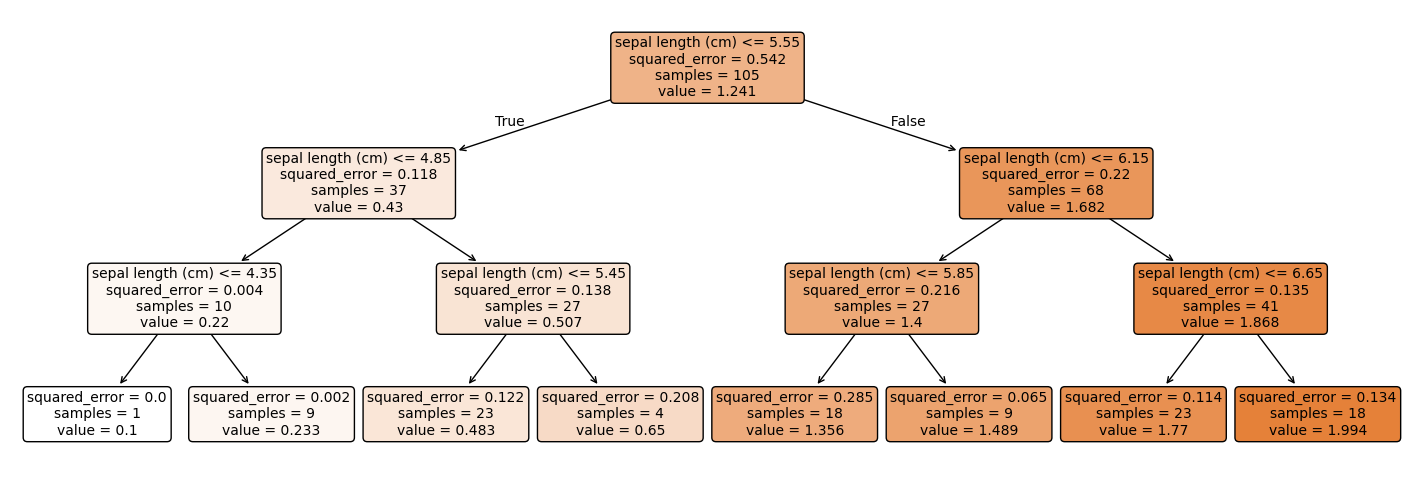

In [28]:
from sklearn import tree
from sklearn.tree import export_text

# textual representation
tree_text = export_text(tree_rg, feature_names=['sepal length (cm)'])
print(tree_text)

# visualize
fig = plt.figure(figsize=(18, 6))
tree_plot = tree.plot_tree(tree_rg,feature_names=['sepal length (cm)'],filled=True,rounded=True,fontsize=10)
plt.show()


**Question 2. Based on the plot of the tree, what it the prediction of the `petal width` for the new observation with `sepal length`= 2,4 ? How is computed the prediction on each leaf of the tree ?**

Answer: 0.1

**Question 3. Compute the predictions of both models on the test set.** 

In [29]:
##TODO
tree_predict = tree_rg.predict(X_test) 
ln_predict = ln_model.predict(X_test)

**Question 4. Display the data using a scatter plot and superimpose as two lines the predictions of both the models.** 

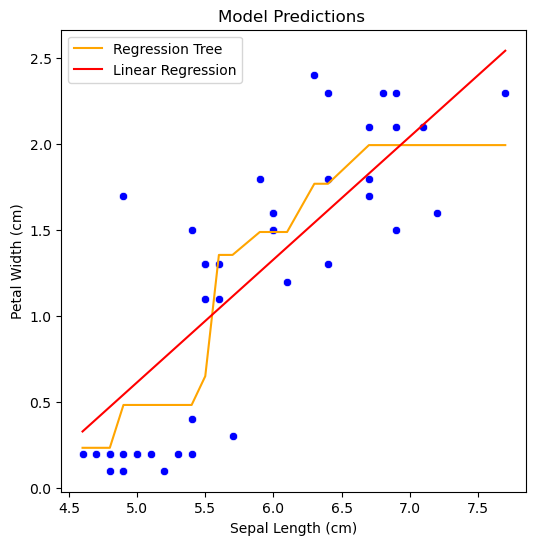

In [30]:
# Combine X_test, y_test, and predictions into a DataFrame
plot_df = X_test.copy()
plot_df['y_actual'] = y_test
plot_df['tree_pred'] = tree_predict
plot_df['ln_pred'] = ln_predict

# Sort by feature for smooth lines
plot_df = plot_df.sort_values(by='sepal length (cm)')

plt.figure(figsize=(6,6))
sns.scatterplot(x='sepal length (cm)', y='y_actual', data=plot_df, color='blue') # Scatter plot of actual data
plt.plot(plot_df['sepal length (cm)'], plot_df['tree_pred'],  color='orange', label='Regression Tree')# Regression tree
plt.plot(plot_df['sepal length (cm)'], plot_df['ln_pred'], color='red', label='Linear Regression')# Linear regression: smooth line

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Model Predictions ')
plt.legend()
plt.show()


**Question 5. Compute the error for both the models. Interpret the results.**

In [34]:
##TODO
from sklearn.metrics import mean_squared_error, r2_score
tree_score = mean_squared_error(y_test, tree_predict)  
ln_score = mean_squared_error(y_test, ln_predict)  

print("Regression Tree MSE:", tree_score ,"Linear model MSE:", ln_score)

tree_r2 = r2_score(y_test, tree_predict)
ln_r2 = r2_score(y_test, ln_predict)
print("Regression Tree R²:", ln_r2 ,"Linear model R²:", tree_r2)

Regression Tree MSE: 0.1715359375688788 Linear model MSE: 0.19520473989636733
Regression Tree R²: 0.6976151293640465 Linear model R²: 0.7342796475192164
